# Resampling: Permutation Test and the Bootstrap

## Two Paired Samples Hypothesis Tests

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
from statsmodels.stats import weightstats as stests
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set_style("whitegrid")  

## Bootstrap method for two Paired Samples Hypothesis Test

## Permutation Test for two Paired Samples Hypothesis Test

Remember:
- H0: mean(grade_before) == mean(grade_after)
- H1: mean(grade_before) != mean(grade_after)

mean(grade_before) == mean(grade_after) is equivalent to mean(diff) == 0

We can reformulate the hypothesis as:
- H0: mean(diff) == 0
- H1: mean(diff) != 0

If we swap the before and after values of some students, the result will be the same under H0. This is the main idea of the permutation test for paired data.

The idea of the permutation test for paired samples is to swap the pair values for some cases. If you have 3 - 2 = 1, and you swap the values 3 and 2, you will get 2 - 3 = -1. Swapping the values and calculating the difference is equivalent to multiply by -1 that difference.

Let's start by generating a DastaFrame of samples using our actual difference `diff2` list.

In [19]:
def pairSamples_Generator(sample_data, num_samples=10000, sample_size=100):
    '''
    It returns a DataFrame where each column is a sample.
    '''
    df = pd.DataFrame()
    for k in range(num_samples):
        sampl = np.random.choice(sample_data, size=sample_size)
        sign = [1 if np.random.rand()<0.5 else -1 for i in range(sample_size)]
        sign = np.array(sign)
        column_name = 'Sample'+str(k)
        df[column_name] = sampl * sign
    return(df)

In [20]:
df_1 = pairSamples_Generator(diff, num_samples=10000, sample_size=20)
print(df_1.shape)

(20, 10000)


We are going to use the mean of the diferences as our statistic test.

In [21]:
def df_mean(df):
    '''
    It calculates the mean for each col of df
    '''
    return(list(df.mean()))

In [22]:
mean_diff = df_mean(df_1)

Let's use the function for hypothesis testing.

In [24]:
def Graph_Resampling_Hypothesis_Test(scores, test_value, alpha=0.05, alternative='two-sided'):
    '''
    scores: list with the sampling distribution
    test_value: hypothesized value
    alpha: significance level
    alternative: one of the three values: 'two-sided', 'smaller', and 'larger'    
    '''
    print('--- Resampling Method ---')
    scores_mean  = np.round(np.mean(scores),2)
    print('    Sample mean =', np.mean(scores_mean))
    ax = sns.kdeplot(x=scores, color='lightskyblue', shade=True, alpha=0.4)
    plt.axvline(x = scores_mean, color='skyblue', linewidth=2)
    plt.axvline(x = test_value, ymin=0, ymax= 0.05, color='black', linewidth=6)
    plt.title('Sampling Distribution')
    ecdf = ECDF(scores) 
    if alternative=='two-sided':
        cv1 = np.round(np.percentile(scores, (alpha/2)*100),2)     #critical value left
        cv2 = np.round(np.percentile(scores, 100-alpha/2*100),2)     #critical value right
        plt.axvline(x = cv1, ymin=0, ymax=0.5, color='orangered', linewidth=2)
        plt.axvline(x = cv2, ymin=0, ymax=0.5, color='orangered', linewidth=2);
        if test_value < scores_mean: p_val = 2*np.round(ecdf(test_value),4)
        else: p_val = 2*np.round(1 - ecdf(test_value),4)        
        print('    Critical Regions: (-∞, '+str(cv1)+'), ('+str(cv2)+', ∞)')
        print('    p-value = '+str(np.round(p_val,4)))
    elif alternative=='smaller':
        cv1 = np.round(np.percentile(scores, alpha*100),2)  #critical value left 
        plt.axvline(x = cv1, ymin=0, ymax=0.5, color='orangered', linewidth=2)
        p_val = np.round(ecdf(test_value),4)
        print('    Critical Region: (-∞, %.2f)' %cv1)
        print('    p-value = '+str(np.round(p_val,4)))
    else:
        cv1 = np.round(np.percentile(scores, 100-alpha*100),2)  #critical value right 
        plt.axvline(x = cv1, ymin=0, ymax=0.5, color='orangered', linewidth=2)
        p_val = np.round(1 - ecdf(test_value),4)
        print('    Critical Region: (%.2f, ∞)' %cv1)
        print('    p-value = '+str(np.round(p_val,4)))

--- Resampling Method ---
    Sample mean = -0.12
    Critical Regions: (-∞, -10.42), (10.38, ∞)
    p-value = 0.0


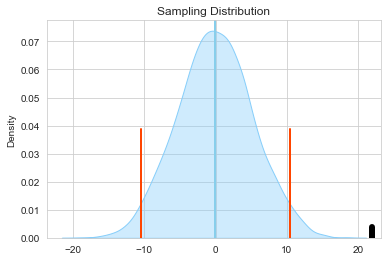

In [13]:
Graph_Resampling_Hypothesis_Test(mean_diff, test_stat)

**Example 2**: Analyzing `grade_before` - `grade_after2`

In [25]:
diff2 = grade_after2 - grade_before

The mean of the differences `diff2` is going to be our statistic.

In [26]:
test_stat2 = np.mean(diff2)
test_stat2

11.198593830856298

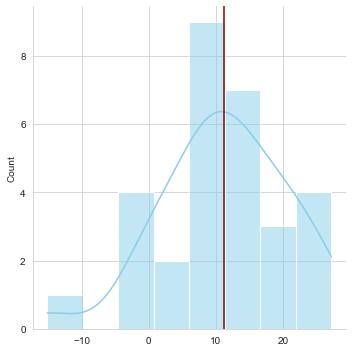

In [27]:
sns.displot(x=diff2, kde='True', color='skyblue')
plt.axvline(x=test_stat2, color='darkred');

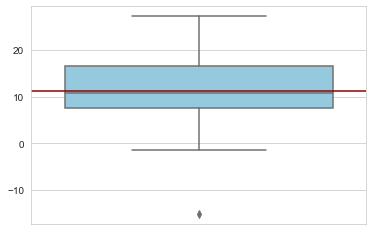

In [28]:
sns.boxplot(y=diff2, color='skyblue')
plt.axhline(y=test_stat2, color='darkred');

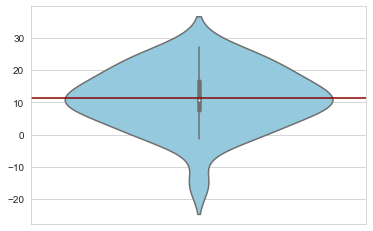

In [29]:
sns.violinplot(y=diff2, color='skyblue')
plt.axhline(y=test_stat2, color='darkred');

Remember:
- H0: mean(grade_before) == mean(grade_after2)
- H1: mean(grade_before) != mean(grade_after2)

mean(grade_before) == mean(grade_after2) is equivalent to mean(diff2) == 0

We can reformulate the hypothesis as:
- H0: mean(diff2) == 0
- H1: mean(diff2) != 0

In [30]:
df_2 =pairSamples_Generator(diff2, num_samples=10000, sample_size=20)
print(df_2.shape)

(20, 10000)


In [31]:
mean_diff2 = df_mean(df_2)

--- Resampling Method ---
    Sample mean = -0.01
    Critical Regions: (-∞, -6.31), (6.28, ∞)
    p-value = 0.0006


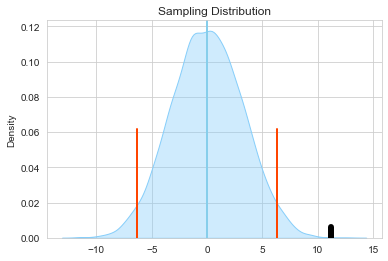

In [32]:
Graph_Resampling_Hypothesis_Test(mean_diff2, test_stat2)

--- Resampling Method ---
    Sample mean = -0.01
    Critical Region: (5.31, ∞)
    p-value = 0.0003


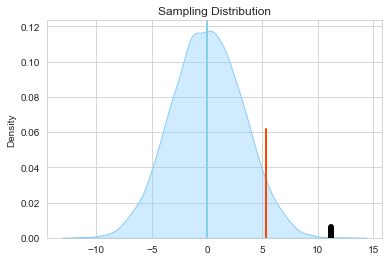

In [33]:
Graph_Resampling_Hypothesis_Test(mean_diff2, test_stat2, alternative='larger')

**Example 3**: The data represent the observed pollution indexes of air samples in two areas of a city. Test the hypothesis that the mean pollution indexes are the same for the two areas. 

In [34]:
areaA = np.array([2.92, 1.88, 5.35, 3.81, 4.69, 4.86, 5.81, 5.55])
areaB = np.array([1.84, 0.95, 4.26, 3.18, 3.44, 3.69, 4.95, 4.47])

In [35]:
diff3 = areaB - areaA

In [36]:
test_stat3 = np.mean(areaB) - np.mean(areaA)
test_stat3

-1.0112500000000004

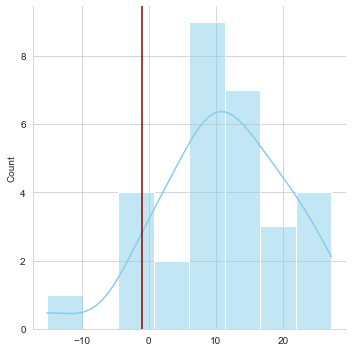

In [37]:
sns.displot(x=diff2, kde='True', color='skyblue')
plt.axvline(x=test_stat3, color='darkred');

In [38]:
df_3 =pairSamples_Generator(diff3, num_samples=10000, sample_size=8)
print(df_3.shape)

(8, 10000)


In [39]:
mean_diff3 = df_mean(df_3)

--- Resampling Method ---
    Sample mean = 0.0
    Critical Regions: (-∞, -0.72), (0.72, ∞)
    p-value = 0.0046


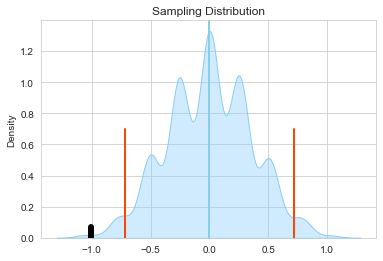

In [40]:
Graph_Resampling_Hypothesis_Test(mean_diff3, test_stat3)

# DE LA OTRA NOTEBOOK

## Permutation method for two independent samples hypothesis test

Let's use a permutation test to determine whether the two means (classC and classD) are diferent from each other.

The method is very similar to the bootstrap, but a fundamental difference between it and the bootstrap is that the bootstrap resamples with replacement and the permutation test does not. Then, we will use `np.random.choice()` with `replace=False` 

Hypothesis

- `Ho: mean_C  = mean_D     or     mean_C - mean_D  = 0`
- `Ha: mean_C != mean_D     or     mean_C - mean_D != 0`

In [ ]:
test_stat = np.mean(classC) - np.mean(classD)
test_stat

Now, we will pool all the data together and randomly split the data into two groups: classC and classD.

We will repeat the process many times (about 10**4)

**Main idea**: If there is truly no difference between the averages grades of classC and classD, there will be no differences between the average grades of the generated groups.

In [ ]:
print('Lenght classC =',len(classC))
print('Lenght classD =',len(classD))

In [ ]:
# concatenating
pooled_data = np.concatenate([classC, classD])
print('Lenght pooled =', len(pooled_data))

In [ ]:
def generateSamplesPerm(sample_data, num_samples=10000, sample_size=100):
    '''
    It returns a DataFrame where each column is a sample (without replacement).
    '''
    df = pd.DataFrame()
    for k in range(num_samples):
        sampl = np.random.choice(sample_data, replace=False, size=sample_size)
        column_name = 'Sample'+str(k)
        df[column_name] = sampl
    return(df)

In [ ]:
# generating samples for classC
gen_C = generateSamplesPerm(pooled_data, num_samples=10000, sample_size=100)
gen_C.shape

In [ ]:
# generating samples for classD
gen_D = generateSamplesPerm(pooled_data, num_samples=10000, sample_size=90)
gen_D.shape

In [ ]:
# Calculating the means of genC
mean_C = gen_C.mean()

In [ ]:
type(mean_C)

In [ ]:
# Calculating the means of genD
mean_D = gen_D.mean()

In [ ]:
diff_means = mean_C - mean_D

In [ ]:
len(diff_means)

With the `diff_means` array and the statistic `test_stat`, we can call our `Graph_Resampling_Hypothesis_Test` to determine whether accept or reject the null hypothesis.

In [ ]:
graphHypothesisTest(diff_means, test_stat)

We reject the null hypothesis. The two samples (classC and classD) are different on average.

Remember `test_stat = np.mean(classC) - np.mean(classD)`

Let's test an smaller alternative hypothesis, meaning mean(classC) < mean(classD)

In [ ]:
graphHypothesisTest(diff_means, test_stat, alternative='larger')

We reject the null hypothesis, so classC is lesser than classD in average.

Let's create a function for using the permutation test to compare two samples.

In [ ]:
def graphTwoIndSamplesHTPerm(sample1, sample2, alpha=0.05, alternative='two-sided'):
    '''
    It compares sample1 and sample 2 using the permutation test.
    sample1, sample2: the samples to be compared
    alpha: significance level
    alternative: one of the three values: 'two-sided', 'smaller', or 'larger'    
    '''
    stat = np.mean(sample1) - np.mean(sample2)
    pooled_data = np.concatenate([sample1, sample2])
    df1 = generateSamplesPerm(pooled_data, num_samples=10000, sample_size=len(sample1))
    df2 = generateSamplesPerm(pooled_data, num_samples=10000, sample_size=len(sample2))
    diff_means = df1.mean() - df2.mean()
    graphHypothesisTest(diff_means,stat,alpha,alternative)

Example 2. We have the amount of money that students spend in books for a semester in one university. 

***Research question***: Do the science students spend more money on books as average than art students?

**Hypothesis**:
- Ho: mean_science = mean_art   `or`   mean_science - mean_art = 0
- H1: mean_science > mean_art   `or`   mean_science - mean_art > 0 

In [ ]:
science = [190, 280, 290, 250, 300, 286, 298, 243, 220, 310]
print(np.mean(science))

In [ ]:
art = [280, 260, 250, 220, 240, 260, 270, 260, 250, 300]
print(np.mean(art))

In [ ]:
graphTwoIndSamplesHTPerm(art, science)

We have no reasons for rejecting the null hypothesis. 

The spending of science and art students on books are similar on average.